In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 23 16:33:17 2020

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-1-13b88862eb3d>, line 3)

In [2]:
@author: ka2461
"""

SyntaxError: invalid syntax (<ipython-input-2-f8f39467a08f>, line 1)

In [55]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal as ps
import geopandas as gpd
from sklearn import cluster
from sklearn.preprocessing import scale

In [56]:
sns.set(style="whitegrid")

In [57]:
abb_link = 'C:\\Users\\user\\Desktop\\Arastirma Gorevi\\kodlar\\data_phyton\\data_codes.csv'
zc_link = 'C:\\Users\\user\\Desktop\\Arastirma Gorevi\\kodlar\\data_phyton\\lvl1-TR.geojson'

In [58]:
lst = pd.read_csv(abb_link)
lst.zipcode.astype(int)
  
varis = ['price-9']
aves = lst.groupby('zipcode')[varis].mean() 

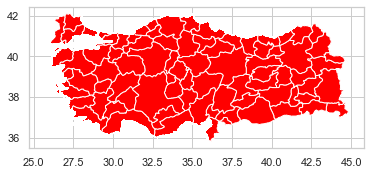

In [59]:

zc = gpd.read_file(zc_link)
zc.plot(color='red');

In [91]:
zdb = zc[['geometry', 'zipcode', 'Name']].join(aves, on='zipcode')\
                                         .dropna()

km5 = cluster.KMeans(n_clusters=5)
km5cls = km5.fit(zdb.drop(['geometry', 'Name'], axis=1).values)
km5cls.fit(aves)


KMeans(n_clusters=5)

In [96]:


df1 = pd.DataFrame(zrt.drop(columns='geometry'))
df1['Labels'] = km5cls.labels_
list_0=[]
list_1=[]
list_2=[]
list_3=[]
list_4=[]

list_sum=[]
for j in range(len(df1)):
    if(df1['Labels'].iloc[j]==0):

        list_0.append(df1["price-9"].iloc[j].mean())

    elif(df1['Labels'].iloc[j]==1):

        list_1.append(df1["price-9"].iloc[j].mean())

    elif(df1['Labels'].iloc[j]==2):

        list_2.append(df1["price-9"].iloc[j].mean())

    elif(df1['Labels'].iloc[j]==3):

        list_3.append(df1["price-9"].iloc[j].mean())
    elif(df1['Labels'].iloc[j]==4):
         list_4.append(df1["price-9"].iloc[j].mean())
            
print("KMeans Method with 5 cluster")
print()
print("Label 0 Average Value: ",np.mean(list_0))
print("Label 1 Average Value: ",np.mean(list_1))
print("Label 2 Average Value: ",np.mean(list_2))
print("Label 3 Average Value: ",np.mean(list_3))
print("Label 4 Average Value: ",np.mean(list_4))


KMeans Method with 5 cluster

Label 0 Average Value:  42.173459864
Label 1 Average Value:  17.527863992096773
Label 2 Average Value:  64.15839033714285
Label 3 Average Value:  24.41226881576923
Label 4 Average Value:  52.12427849428572


In [97]:
km2 = cluster.KMeans(n_clusters=2)
km2cls = km2.fit(zdb.drop(['geometry', 'Name'], axis=1).values)
km2cls.fit(aves)
df2 = pd.DataFrame(zrt.drop(columns='geometry'))
df2['Labels'] = km2cls.labels_
list_0=[]
list_1=[]
list_2=[]
list_3=[]
list_4=[]

list_sum=[]
for j in range(len(df2)):
    if(df2['Labels'].iloc[j]==0):

        list_0.append(df2["price-9"].iloc[j].mean())

    elif(df2['Labels'].iloc[j]==1):

        list_1.append(df2["price-9"].iloc[j].mean())
        
print("KMeans Method with 2 cluster")
print()
print("Label 0 Average Value: ",np.mean(list_0))
print("Label 1 Average Value: ",np.mean(list_1))



KMeans Method with 2 cluster

Label 0 Average Value:  20.928155022844827
Label 1 Average Value:  52.17230704782608


In [98]:
km3 = cluster.KMeans(n_clusters=3)
km3cls = km3.fit(zdb.drop(['geometry', 'Name'], axis=1).values)
km3cls.fit(aves)
df3 = pd.DataFrame(zrt.drop(columns='geometry'))
df3['Labels'] = km3cls.labels_
list_0=[]
list_1=[]
list_2=[]

list_sum=[]
for j in range(len(df3)):
    if(df3['Labels'].iloc[j]==0):

        list_0.append(df3["price-9"].iloc[j].mean())

    elif(df3['Labels'].iloc[j]==1):

        list_1.append(df3["price-9"].iloc[j].mean())
    elif(df3['Labels'].iloc[j]==2):

        list_2.append(df3["price-9"].iloc[j].mean())

print("KMeans Method with 3 cluster")
print()
print("Label 0 Average Value: ",np.mean(list_0))
print("Label 1 Average Value: ",np.mean(list_1))
print("Label 2 Average Value: ",np.mean(list_2))

KMeans Method with 3 cluster

Label 0 Average Value:  20.668118823947367
Label 1 Average Value:  44.89775938733333
Label 2 Average Value:  62.47187662777779


In [27]:
zrt = zdb
zrt.to_file('tmp')
w = ps.queen_from_shapefile('tmp/tmp.shp', idVariable='zipcode')
# NOTE: this might not work on Windows
#! rm -r tmp
n_rev = aves
p = np.ones((w.n,1), float)
           
thr = 30

AttributeError: module 'pysal' has no attribute 'queen_from_shapefile'

In [31]:
np.random.seed(1234)

In [32]:
z = zrt.drop(['geometry', 'zipcode','Name'], axis=1).values
maxp = ps.region.Maxp(w, z, thr, n_rev.values[:, None], initial=40)

AttributeError: module 'pysal' has no attribute 'region'

In [33]:
np.random.seed(1234)
maxp.cinference(nperm=999)
maxp.cpvalue

NameError: name 'maxp' is not defined

In [34]:
lbls = pd.Series(maxp.area2region).reindex(zrt['zipcode'])
f, ax = plt.subplots(1, figsize=(9, 9))

NameError: name 'maxp' is not defined

In [35]:
zrt.assign(cl=lbls.values)\
   .plot(column='cl', categorical=True, legend=True, \
         linewidth=0.1, edgecolor='white', ax=ax)

NameError: name 'lbls' is not defined

In [36]:
ax.set_axis_off()

In [37]:
plt.show()